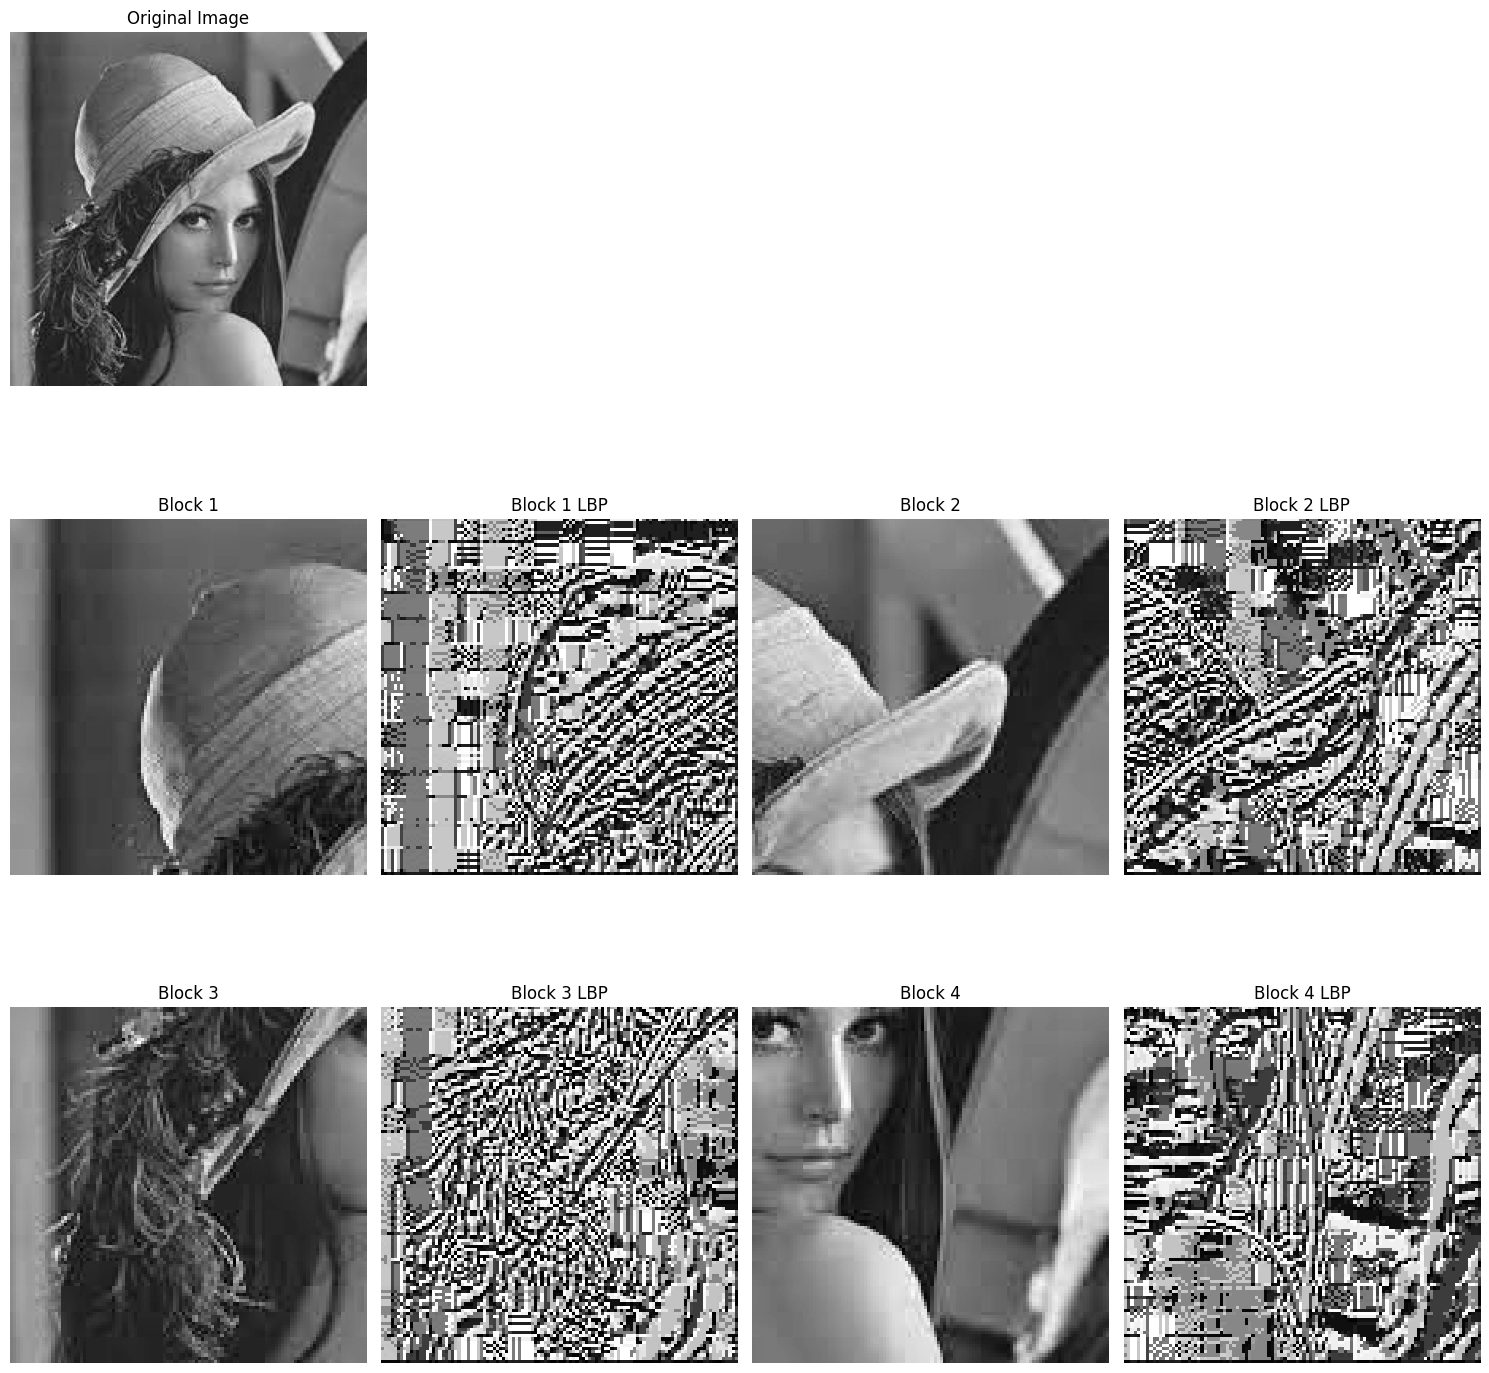

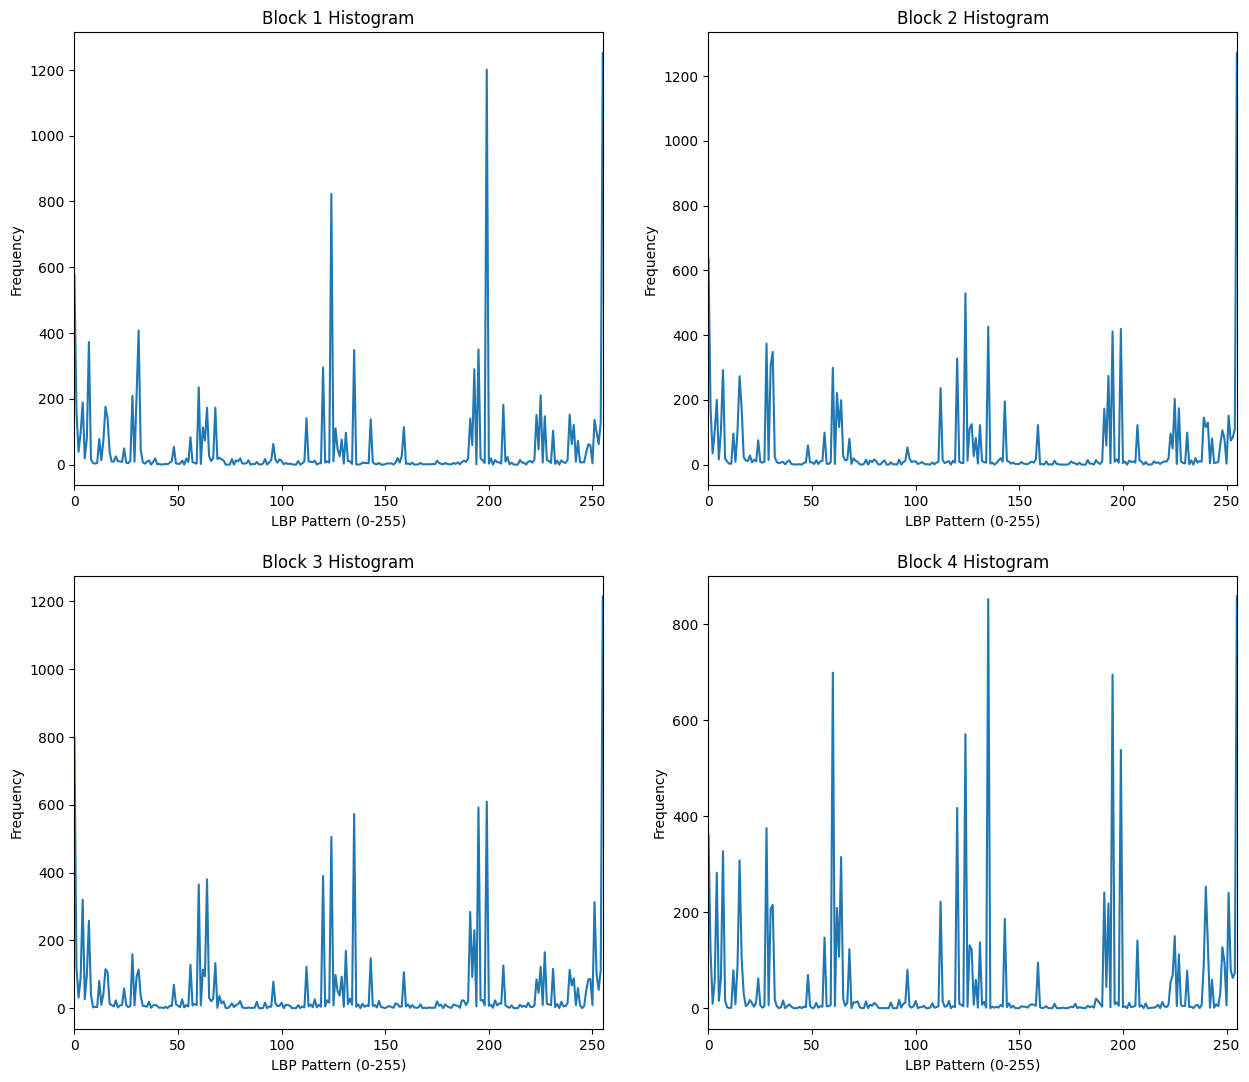

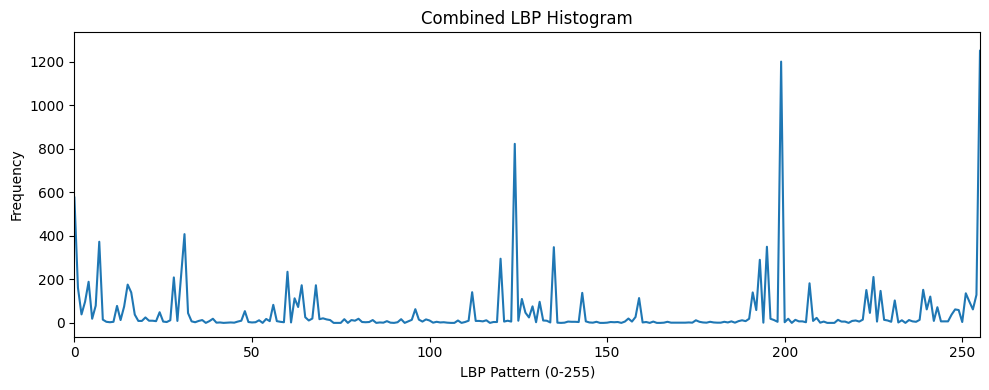

Total number of features: 1024


In [16]:
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from skimage import io, color
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load and preprocess the image."""
    image = io.imread(image_path)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    return image

def split_image_into_blocks(image, num_blocks):
    """Split image into num_blocks x num_blocks blocks."""
    if not (num_blocks & (num_blocks - 1) == 0):
        raise ValueError("Number of blocks must be a power of 2")
        
    height, width = image.shape
    block_height = height // num_blocks
    block_width = width // num_blocks
    
    blocks = []
    for i in range(num_blocks):
        for j in range(num_blocks):
            block = image[i*block_height:(i+1)*block_height, 
                        j*block_width:(j+1)*block_width]
            blocks.append(block)
    
    return blocks

def extract_block_lbp(image, num_blocks, num_points=8, radius=1):
    """Extract LBP features for each block and combine them."""
    blocks = split_image_into_blocks(image, num_blocks)
    block_histograms = []
    block_lbps = []
    
    for block in blocks:
        # Changed to 'default' method instead of 'uniform'
        lbp = local_binary_pattern(block, num_points, radius, method='default')
        # Using 256 bins for full range of patterns
        hist, _ = np.histogram(lbp.ravel(), bins=256, range=(0, 256))
        block_histograms.append(hist.astype('float'))
        block_lbps.append(lbp)
    
    combined_histogram = np.concatenate(block_histograms)
    return block_lbps, block_histograms, combined_histogram

def visualize_block_lbp(image, block_lbps, block_histograms, combined_histogram, num_blocks):
    """Visualize original image, block-wise LBP patterns, and histograms."""
    # Create figure for blocks and their LBP patterns
    plt.figure(figsize=(15, 15))
    total_subplots = (num_blocks * num_blocks) * 2 + 1  # blocks, LBPs, and original
    cols = num_blocks * 2
    rows = num_blocks + 1
    
    # Plot original image
    plt.subplot(rows, cols, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot blocks and their LBP patterns side by side
    for i in range(num_blocks * num_blocks):
        # Plot original block
        plt.subplot(rows, cols, cols + i*2 + 1)
        block_size = image.shape[0] // num_blocks
        row = (i // num_blocks) * block_size
        col = (i % num_blocks) * block_size
        plt.imshow(image[row:row+block_size, col:col+block_size], cmap='gray')
        plt.title(f'Block {i+1}')
        plt.axis('off')
        
        # Plot LBP pattern
        plt.subplot(rows, cols, cols + i*2 + 2)
        plt.imshow(block_lbps[i], cmap='gray')
        plt.title(f'Block {i+1} LBP')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Create separate figure for histograms
    plt.figure(figsize=(15, 20))
    rows = (num_blocks * num_blocks) // 2 + 1
    cols = 2
    
    # Plot individual histograms with full range
    for i, hist in enumerate(block_histograms):
        plt.subplot(rows, cols, i + 1)
        plt.plot(hist)
        plt.title(f'Block {i+1} Histogram')
        plt.xlabel('LBP Pattern (0-255)')
        plt.ylabel('Frequency')
        plt.xlim(0, 255)  # Set x-axis limits explicitly
    
    # Plot combined histogram in a separate figure
    plt.figure(figsize=(10, 4))
    plt.plot(combined_histogram)
    plt.title('Combined LBP Histogram')
    plt.xlabel('LBP Pattern (0-255)')
    plt.ylabel('Frequency')
    plt.xlim(0, 255)  # Set x-axis limits explicitly
    
    plt.tight_layout()
    plt.show()

def extract_and_visualize_features(image_path, num_blocks=2):
    """Extract and visualize LBP features with full pattern range."""
    image = load_image(image_path)
    
    # Extract and visualize block-wise LBP with full pattern range
    block_lbps, block_histograms, combined_histogram = extract_block_lbp(image, num_blocks)
    visualize_block_lbp(image, block_lbps, block_histograms, combined_histogram, num_blocks)
    
    return combined_histogram

# Example usage:
image_path = "lenna.png"
num_blocks = 2
features = extract_and_visualize_features(image_path, num_blocks)
print(f"Total number of features: {len(features)}")

<!-- 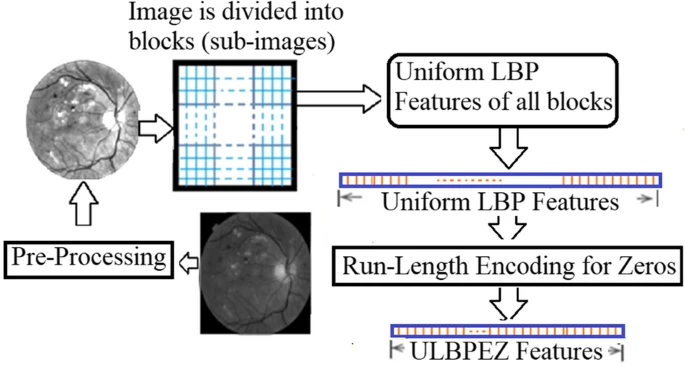 -->

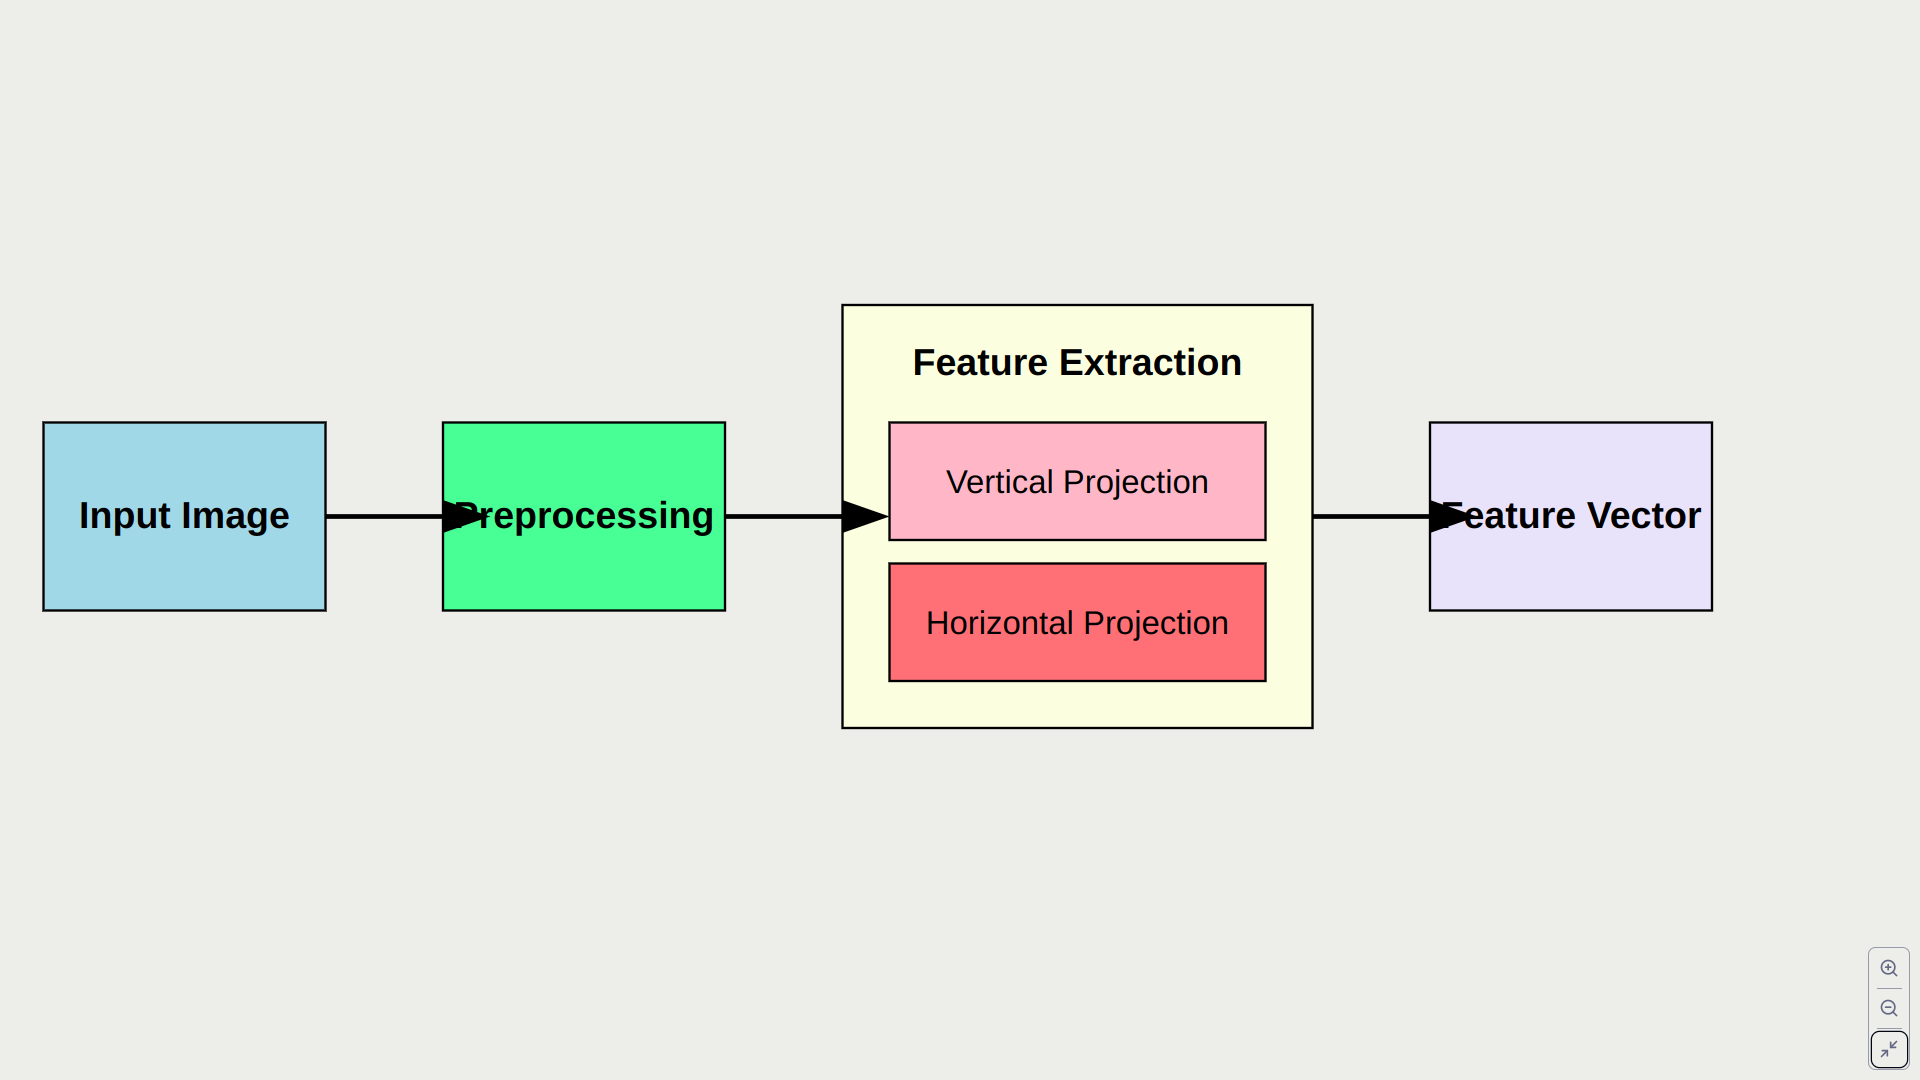

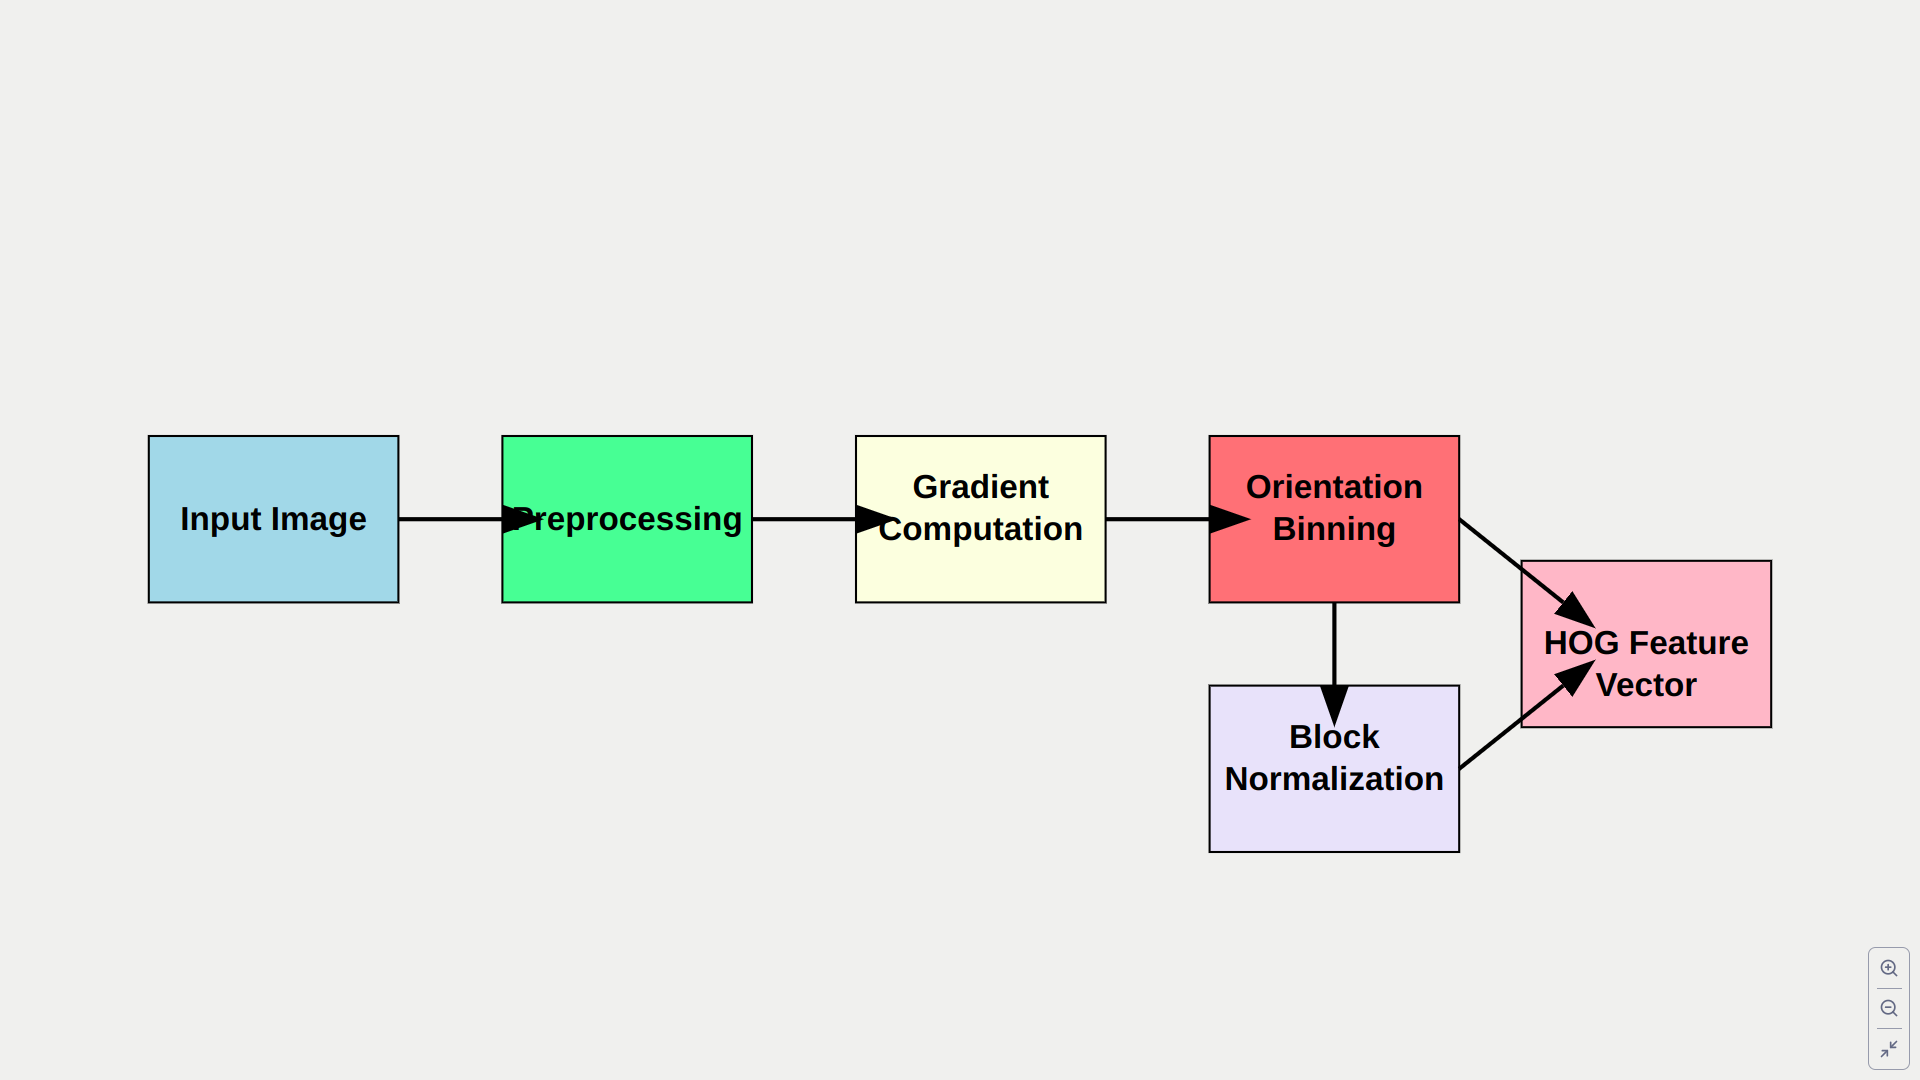

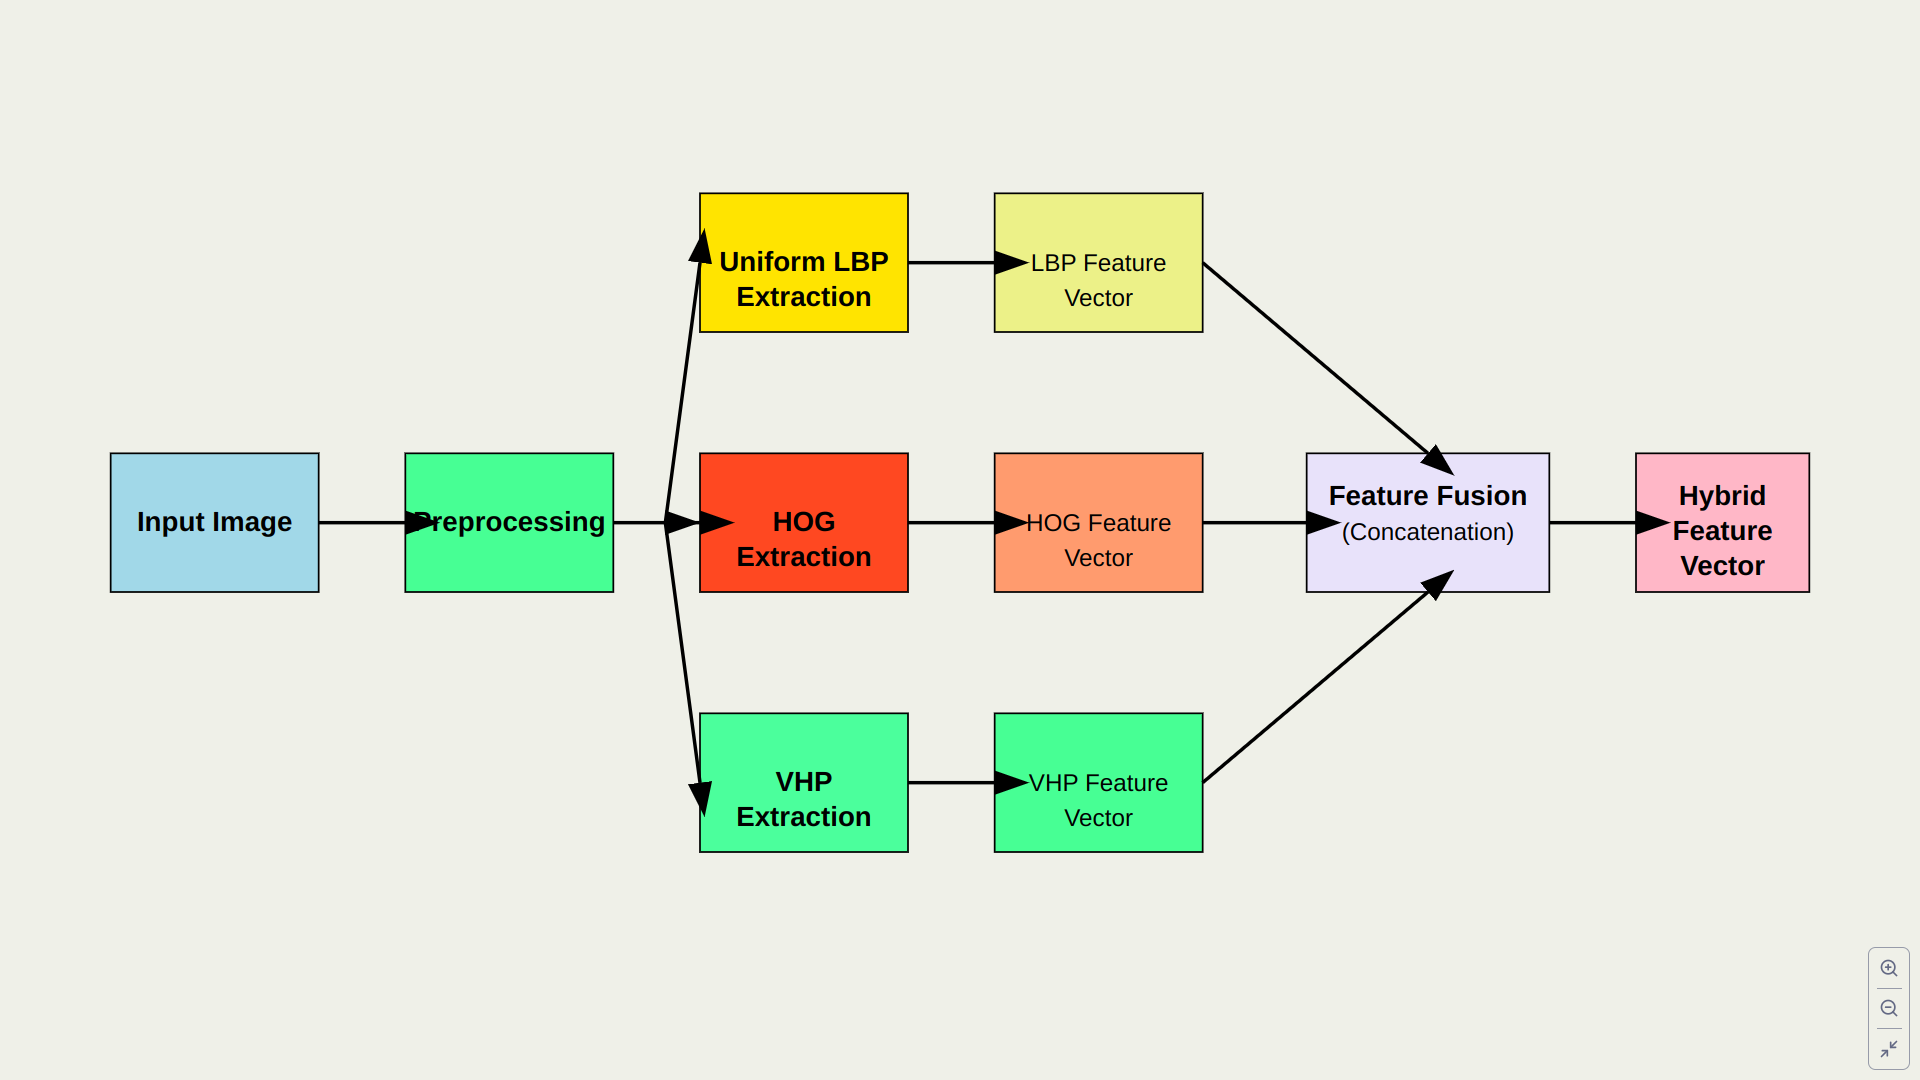